### ASTR 3300/5300-003: Astrostatistics
***N. Pol***
___

# Homework 3
### Due: Friday, Feb 14th at 11.59pm CST
---

## Only one problem this week

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw3_data_1.npy`. This is a (50 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Reusing some approaches and tools from `Lecture_6`, write a ln-likelihood function for heteroscedastic Gaussian data, and use it in a fitting algorithm to find the best-fit mean. *Remember that scipy optimizers are set up to minimize functions.*

3) Using the same numerical technique from `Lecture_5`, compute the Fisher uncertainty estimate on the mean.

4) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

5) Repeat (2) with all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

6) While we have fitted a heteroscedastic Gaussian to this data, let's try something else. Write some code to define a ln-likelihood for a Laplace distribution evaluated on this data. Fit simultaneously for the Laplace location parameter $\mu$ and scale parameter $\Delta$.

7) Compute the AIC values for the heteroscedastic Gaussian model and the Laplacian model. Which model is favored by the data?

8) Using the $1000$ bootstrap datasets from before, fit for the Laplacian $\mu$ and $\Delta$ for each. Make a nice `corner` plot of the distributions of $\mu$ and $\Delta$ that shows both the marginal $1$D distributions and the joint $2$D distribution. Make sure the plot has labels, shows the titles on each $1$D marginal panel, and has $68\%$ and $95\%$ levels.

9) Let's finish with a Fisher uncertainty estimate of the Laplacian parameters. Use the following code to install `numdifftools` which provides a simple way to compute derivatives. We can then compute the Hessian matrix, which is the matrix of the second derivatives of the user's function. This should be computed at the best-fit Laplacian parameters $\mu$ and $\Delta$. To finish, invert the matrix, and then take the square root. The diagonal entries will then be the Fisher uncertainties on $\mu$ and $\Delta$. How does these compare to the bootstrap distribution widths found in (8)?

In [ ]:
!pip install numdifftools

In [1]:
import numdifftools as nd
H = nd.Hessian(f_lnlaplace)([beta_laplace[0], beta_laplace[1]])
sigma_laplace = np.linalg.inv(H)**0.5

NameError: name 'f_lnlaplace' is not defined

### Solution

Part #1: Best fit Mean: 3.937547512109005, Standard Error: 0.11507206049948653

Part #2:Best-fit Gaussian mean: 3.917992036502219

Part #3: Fisher Uncertainty: 0.09481084100510954



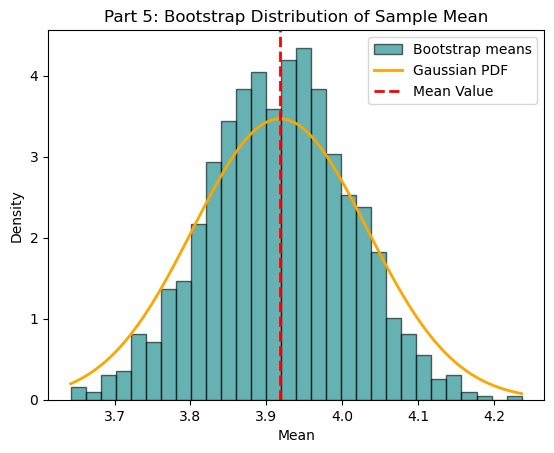

Part #6: Best-fit Laplace parameters: mu=4.085951746169762, delta=0.882269246180275

Part #7: AIC Gaussian: 296.51572577461747, AIC Laplace: 317.5778323531802


/var/folders/98/f0fty1gj2kl6n9j2plm2fzzm0000gn/T/ipykernel_88216/1759997289.py:53: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.abs(x - mu) / delta + np.log(2 * delta))
/var/folders/98/f0fty1gj2kl6n9j2plm2fzzm0000gn/T/ipykernel_88216/1759997289.py:53: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.abs(x - mu) / delta + np.log(2 * delta))
/var/folders/98/f0fty1gj2kl6n9j2plm2fzzm0000gn/T/ipykernel_88216/1759997289.py:53: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.abs(x - mu) / delta + np.log(2 * delta))
/var/folders/98/f0fty1gj2kl6n9j2plm2fzzm0000gn/T/ipykernel_88216/1759997289.py:53: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.abs(x - mu) / delta + np.log(2 * delta))
/var/folders/98/f0fty1gj2kl6n9j2plm2fzzm0000gn/T/ipykernel_88216/1759997289.py:53: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.abs(x - mu) / delta + np.log(2 * delta))
/var/folders/98/f0fty1gj2kl6n9j2plm

<Figure size 800x800 with 0 Axes>

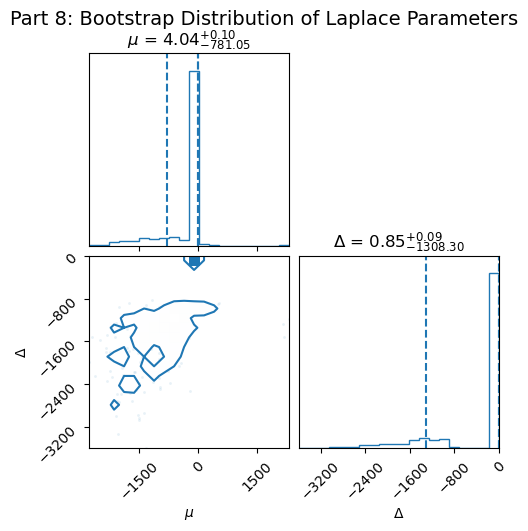

NameError: name 'beta_laplace' is not defined

In [68]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
import corner
import numdifftools as nd

# Reading in data (hw3_data1.np)
data = np.load("/Users/kendrajeanjacques/repos/ASTR_3300_S2025/coursework/homeworks/hw_data/hw3_data_1.npy")
measurements, uncertainties = data[:, 0], data[:, 1]

# Part 1: Compute sample mean and standard error from the data that was read in 
mean_sample = np.mean(measurements)
std_error = np.std(measurements) / np.sqrt(len(measurements))
print(f"Part #1: Best fit Mean: {mean_sample}, Standard Error: {std_error}\n")

# Part 2: Define ln-likelihood function for heteroscedastic Gaussian
def ln_likelihood_gaussian(params, x, sigma):
    mu = params[0]
    return -0.5 * np.sum(((x - mu) / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2)) #Used log likelihood function from lecture #6

# Part 2 continued: Minimize negative log-likelihood
res = opt.minimize(lambda p: -ln_likelihood_gaussian(p, measurements, uncertainties), x0=[mean_sample])
best_fit_mu = res.x[0]
print(f"Part #2:Best-fit Gaussian mean: {best_fit_mu}\n") #Approach adapted from lecture #6

# Part 3: Fisher uncertainty estimate using numerical method from lecture #5
fisher_uncertainty = np.sqrt(1/np.sum(1/(uncertainties**2)))
print(f"Part #3: Fisher Uncertainty: {fisher_uncertainty}\n")

# Part 4: Generate 1000 bootstrap realizations from data-sets
n_bootstrap = 1000
bootstrap_means = np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    indices = np.random.choice(len(measurements), len(measurements), replace=True)
    bootstrap_means[i] = np.sum(measurements[indices] / uncertainties[indices]**2) / np.sum(1 / uncertainties[indices]**2)

# Part 5: Plotting normalized bootstrap distribution
plt.figure()
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.6, label="Bootstrap means", color='teal', edgecolor='black')#Ensures normalized plot
x = np.linspace(min(bootstrap_means), max(bootstrap_means), 100)
plt.plot(x, stats.norm.pdf(x, weighted_mean, std_error), label="Gaussian PDF", color='orange', linewidth=2)
plt.axvline(weighted_mean, color='red', linestyle='dashed', linewidth=2, label='Mean Value')
plt.xlabel("Mean")
plt.ylabel("Density")
plt.title("Part 5: Bootstrap Distribution of Sample Mean")
plt.legend()
plt.show()

# Part 6. Define ln-likelihood for Laplace distribution
def ln_likelihood_laplace(params, x):
    mu, delta = params
    return -np.sum(np.abs(x - mu) / delta + np.log(2 * delta))

# Minimize for Laplace parameters
res_laplace = opt.minimize(lambda p: -ln_likelihood_laplace(p, measurements), x0=[mean_sample, np.std(measurements)])
best_fit_mu_laplace, best_fit_delta = res_laplace.x
print(f"Part #6: Best-fit Laplace parameters: mu={best_fit_mu_laplace}, delta={best_fit_delta}\n")

# Part 7: Compute AIC values 
def AIC(log_likelihood, k):
    return 2 * k - 2 * log_likelihood # using log-likelihood from lecture 6 

aic_gaussian = AIC(-res.fun, 1)
aic_laplace = AIC(-res_laplace.fun, 2)
print(f"Part #7: AIC Gaussian: {aic_gaussian}, AIC Laplace: {aic_laplace}")

# Part 8:Using the 1000- bootstrap datasets to fit for the Laplacian 
laplace_params = [opt.minimize(lambda p: -ln_likelihood_laplace(p, sample), x0=[mean_sample, np.std(sample)]).x for sample in bootstrap_samples]
mu_laplace_vals, delta_laplace_vals = zip(*laplace_params)

# Converts bootstrap estimates to arrays
mean_dist_arr = np.array(mu_laplace_vals)
std_dist_arr = np.array(delta_laplace_vals)


stacked_arr = np.column_stack((mean_dist_arr, std_dist_arr))

# Corner plot plot of the distributions with 68% and 95% confidence levels
fig = plt.figure(figsize=(8, 8))
corner.corner(
    stacked_arr,
    labels=[r"$\mu$", r"$\Delta$"],
    levels=[0.68, 0.95],  # 68% and 95% confidence levels
    quantiles=[0.16, 0.5, 0.84],  
    show_titles=True,
    color="tab:blue"
)
plt.subplots_adjust(top=0.9)  # Adjusts layout to move title higher leaving space between plots and title
plt.suptitle("Part 8: Bootstrap Distribution of Laplace Parameters", fontsize=14)
plt.show()

# 9. Fisher uncertainty estimate for Laplace parameters
H = nd.Hessian(f_lnlaplace)([beta_laplace[0], beta_laplace[1]])
sigma_laplace = np.linalg.inv(H)**0.5
